#Install wandb and fetch data

In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00


In [ ]:
# import of libraries
import wandb
import pandas as pd
import numpy as np
from google.colab import drive
from zipfile import ZipFile
import os
from random import shuffle
from PIL import Image
import random
import matplotlib.pyplot as plt
import tempfile
import logging

# 1.3 FETCH DATA

## 1.3.1 Create raw_data artifact

In [ ]:
#mount drive to import dataset from drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#load dataset
path = "/content/gdrive/MyDrive/the_simpsons_cnn/"
!unzip -qn '/content/gdrive/My Drive/the_simpsons_cnn/dataset_simpsons.zip' -d '/content/gdrive/My Drive/the_simpsons_cnn/dataset_simpsons'

In [ ]:
# arrays where we'll put the image data and their labels
img_data = []
img_label = []

# list characteres
dataset_path = '/content/gdrive/My Drive/the_simpsons_cnn/dataset_simpsons/simpsons_dataset'

for folder in os.listdir(dataset_path):
    character_folder = (os.listdir(dataset_path + "/" + folder))

    for img in character_folder:
        try:
            # open the image with PIL library
            im = Image.open(dataset_path + "/" + folder + "/" + img)

            if im.mode != 'RGBA':
                im = im.convert('RGBA')

            # resize the images to the same size
            im = im.resize((100, 100))
            im = np.array(im, dtype='float32')

            # normalizing the pixel values of each image involves dividing each pixel value by 255 (the maximum possible value)
            im /= 255

            # append the data on the arrays
            img_data.append(im)
            img_label.append(folder)

        except Exception as e:
            # Handle the exception, for example, print an error message
            print(f"Error processing image {img} in folder {folder}: {e}")


Error processing image pic_0279.jpg in folder abraham_grampa_simpson: cannot identify image file '/content/gdrive/My Drive/the_simpsons_cnn/dataset_simpsons/simpsons_dataset/abraham_grampa_simpson/pic_0279.jpg'
Error processing image pic_0457.jpg in folder apu_nahasapeemapetilon: cannot identify image file '/content/gdrive/My Drive/the_simpsons_cnn/dataset_simpsons/simpsons_dataset/apu_nahasapeemapetilon/pic_0457.jpg'


In [ ]:
img_label

In [ ]:
labels = {}
seen_labels = set()

for character_label in img_label:
    if character_label not in seen_labels:
        labels[character_label] = len(seen_labels)
        seen_labels.add(character_label)

for i in range(5):
    n = random.randint(0, len(img_data))
    plt.figure()
    plt.title(labels[img_label[n]])
    plt.imshow(Image.open(img_data[n]))

plt.show()

#Saving the data of the images in a npy archive

In [ ]:
# save the array in a npy archive
np.save('img_data.npy', img_data)

In [ ]:
# load the data of the npy into the variable loaded_data
loaded_data = np.load('img_data.npy')

# print the loaded data
print(loaded_data)

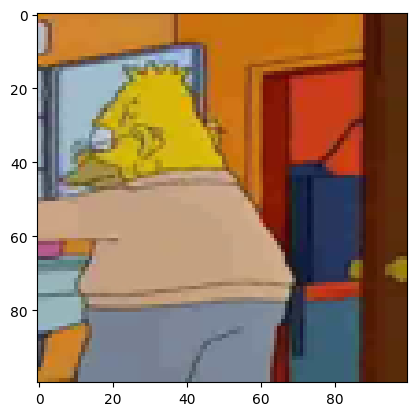

In [ ]:
# random number used to confirm if the conversion is correct
n = random.randint(0, len(img_data))
# img in the original array
plt.imshow(img_data[n])

# Saving the label of the data in csv

In [ ]:
# creating a dictionary with the label array
data = {"character name" : img_label}
# transforming into a dataframe
df = pd.DataFrame(data)
# saving the dataframe into a csv
df.to_csv("label_data.csv", index=False)

# Preprocessing Data

In [ ]:
df.head()

,character name
0,abraham_grampa_simpson
1,abraham_grampa_simpson
2,abraham_grampa_simpson
3,abraham_grampa_simpson
4,abraham_grampa_simpson


In [ ]:
if len(loaded_data) == len(df["character name"]):
    print("Equal values")
else:
    print("Different values")

Equal values


In [ ]:
#login to wandb
!wandb login --relogin

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
run = wandb.init(entity="flateam", project="the_simpsons_characters", job_type="raw_data")

wandb: Currently logged in as: natalia-simoes (flateam). Use `wandb login --relogin` to force relogin


In [ ]:
#creating a wandb artifact
artifact = wandb.Artifact(name="img_data",
                                  type="raw_data",
                                  description="data from the imagens")

# add the file to the artifact
artifact.add_file('img_data.npy')
# save the artifact in W&B
wandb.run.log_artifact(artifact)

artifact2 = wandb.Artifact(name="label_data",
                                  type="raw_data",
                                  description="data from the labels")

# add the file to the artifact
artifact2.add_file('label_data.csv')
# save the artifact in W&B
wandb.run.log_artifact(artifact2)

<Artifact label_data>

In [ ]:
run.finish()